In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [188]:
df = pd.read_csv("C:\\Users\\richd\\Documents\\Personal\\Golf\\round_data.csv")

In [190]:
# heatmap where have direction/distance data

In [191]:
dir_dist = df[df['Direction_Result'].notnull()]
print(dir_dist.shape)

(284, 18)


In [192]:
dir_dist['Distance_Result'].value_counts()

good              183
slightly long      42
slightly short     36
pretty long        14
pretty short        8
way long            1
Name: Distance_Result, dtype: int64

In [193]:
heatmap_df = dir_dist[(dir_dist['Lie'] == 'T') | (dir_dist['Lie'] == 'F') |(dir_dist['Lie'] == 'R') |
                      (dir_dist['Lie'] == 'G')]

In [194]:
# create a crosstab of the two columns
ct = pd.crosstab(heatmap_df['Distance_Result'], heatmap_df['Direction_Result'])

new_index = ['way long', 'pretty long', 'slightly long', 'good', 'slightly short', 'pretty short', 'way short']
new_columns = ['way left', 'pretty left', 'slight left', 'good', 'slight right', 'pretty right', 'way right']

ct = ct.reindex(index=new_index, columns=new_columns)

# Calculate the average values of strokes gained for each category combination
avg = heatmap_df.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()

In [195]:
avg_pivot = avg.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot = avg_pivot.reindex(index=new_index, columns=new_columns)

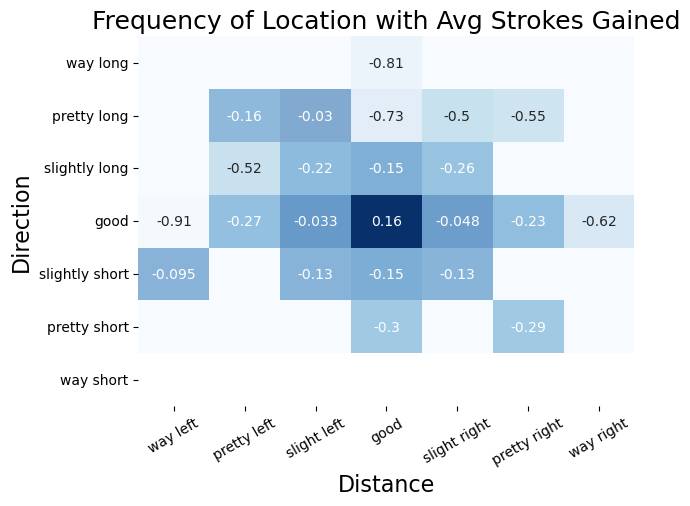

In [196]:
# create the heatmap
sns.heatmap(ct, cmap="Blues", cbar=False)

#sns.heatmap(ct, annot=True, cmap='Blues', cbar=False, 
#            annot_kws={'fontsize':8}, center=ct.values.mean())
sns.heatmap(avg_pivot, 
            annot=True, cmap='Blues', cbar=False, alpha=0.5)

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title('Frequency of Location with Avg Strokes Gained', fontsize=18)

plt.xticks(rotation=30)

# Show the plot
plt.show()

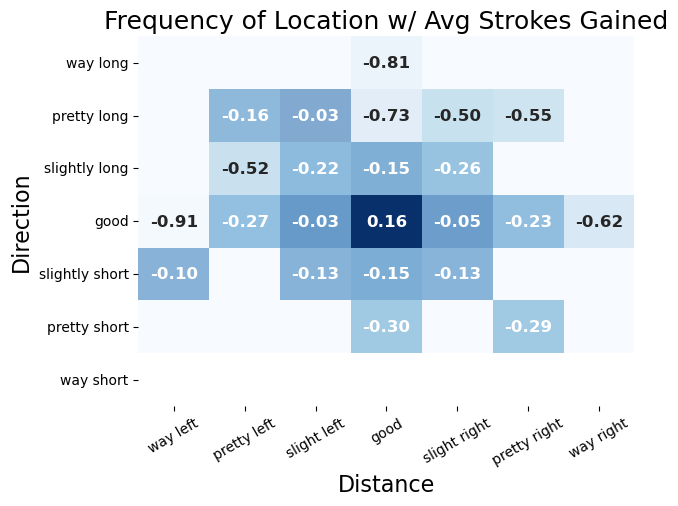

In [197]:
# create the heatmap
sns.heatmap(ct, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot, annot=True, cmap='Blues', cbar=False, alpha=0.5, fmt='.2f',
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title('Frequency of Location w/ Avg Strokes Gained', fontsize=18)
plt.xticks(rotation=30)
plt.yticks(rotation=0)

# Show the plot
plt.savefig('overall.png')



In [198]:
_0_25 = heatmap_df[heatmap_df['Distance Label'] == '0-25']
_26_75 = heatmap_df[(heatmap_df['Distance Label'] == '26-50') | (heatmap_df['Distance Label'] == '51-75')]
_76_125 = heatmap_df[(heatmap_df['Distance Label'] == '76-100') | (heatmap_df['Distance Label'] == '101-125')]
_126_175 = heatmap_df[(heatmap_df['Distance Label'] == '126-150') | (heatmap_df['Distance Label'] == '151-175')]
_176_225 = heatmap_df[(heatmap_df['Distance Label'] == '176-200') | (heatmap_df['Distance Label'] == '201-225')]
Drives = heatmap_df[heatmap_df['Distance Label'] == '250 +']
G_4_9 = heatmap_df[(heatmap_df['Distance Label'] == 'G 4-6')  | (heatmap_df['Distance Label'] == 'G 7-9')]
G_10_plus = heatmap_df[(heatmap_df['Distance Label'] == 'G 10-15') | (heatmap_df['Distance Label'] == 'G 16-20') |
                       (heatmap_df['Distance Label'] == 'G 21-25') | (heatmap_df['Distance Label'] == 'G 26-35') | 
                        (heatmap_df['Distance Label'] == 'G 36-45')]

# create a crosstab of the two columns
ct_0_25 = pd.crosstab(_0_25['Distance_Result'], _0_25['Direction_Result'])
ct_26_75 = pd.crosstab(_26_75['Distance_Result'], _26_75['Direction_Result'])
ct_76_125 = pd.crosstab(_76_125['Distance_Result'], _76_125['Direction_Result'])
ct_126_175 = pd.crosstab(_126_175['Distance_Result'], _126_175['Direction_Result'])
ct_176_225 = pd.crosstab(_176_225['Distance_Result'], _176_225['Direction_Result'])
ct_Drives = pd.crosstab(Drives['Distance_Result'], Drives['Direction_Result'])
ct_G_4_9 = pd.crosstab(G_4_9['Distance_Result'], G_4_9['Direction_Result'])
ct_G_10_plus = pd.crosstab(G_10_plus['Distance_Result'], G_10_plus['Direction_Result'])

new_index = ['way long', 'pretty long', 'slightly long', 'good', 'slightly short', 'pretty short', 'way short']
new_columns = ['way left', 'pretty left', 'slight left', 'good', 'slight right', 'pretty right', 'way right']

ct_0_25 = ct_0_25.reindex(index=new_index, columns=new_columns)
ct_26_75 = ct_26_75.reindex(index=new_index, columns=new_columns)
ct_76_125 = ct_76_125.reindex(index=new_index, columns=new_columns)
ct_126_175 = ct_126_175.reindex(index=new_index, columns=new_columns)
ct_176_225 = ct_176_225.reindex(index=new_index, columns=new_columns)
ct_Drives = ct_Drives.reindex(index=new_index, columns=new_columns)
ct_G_4_9 = ct_G_4_9.reindex(index=new_index, columns=new_columns)
ct_G_10_plus = ct_G_10_plus.reindex(index=new_index, columns=new_columns)

# Calculate the average values of strokes gained for each category combination
avg_0_25 = _0_25.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()
avg_26_75 = _26_75.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()
avg_76_125 = _76_125.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()
avg_126_175 = _126_175.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()
avg_176_225 = _176_225.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()
avg_Drives = Drives.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()
avg_G_4_9 = G_4_9.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()
avg_G_10_plus = G_10_plus.groupby(['Distance_Result', 'Direction_Result'])['Strokes'].mean().reset_index()

In [199]:
avg_pivot_0_25 = avg_0_25.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_0_25 = avg_pivot_0_25.reindex(index=new_index, columns=new_columns)

avg_pivot_26_75 = avg_26_75.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_26_75 = avg_pivot_26_75.reindex(index=new_index, columns=new_columns)

avg_pivot_76_125 = avg_76_125.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_76_125 = avg_pivot_76_125.reindex(index=new_index, columns=new_columns)

avg_pivot_126_175 = avg_126_175.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_126_175 = avg_pivot_126_175.reindex(index=new_index, columns=new_columns)

avg_pivot_176_225 = avg_176_225.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_176_225 = avg_pivot_176_225.reindex(index=new_index, columns=new_columns)

avg_pivot_Drives = avg_Drives.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_Drives = avg_pivot_Drives.reindex(index=new_index, columns=new_columns)

avg_pivot_G_4_9 = avg_G_4_9.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_G_4_9 = avg_pivot_G_4_9.reindex(index=new_index, columns=new_columns)

avg_pivot_G_10_plus = avg_G_10_plus.pivot(index='Distance_Result', columns='Direction_Result', values='Strokes')
avg_pivot_G_10_plus = avg_pivot_G_10_plus.reindex(index=new_index, columns=new_columns)

In [200]:
num_shots_0_25 = len(_0_25)
pct_25_0_25 = round(np.percentile(_0_25['Strokes'], 25), 2)
pct_50_0_25 = round(np.percentile(_0_25['Strokes'], 50), 2)
pct_75_0_25 = round(np.percentile(_0_25['Strokes'], 75), 2)

num_shots_26_75 = len(_26_75)
pct_25_26_75 = round(np.percentile(_26_75['Strokes'], 25), 2)
pct_50_26_75 = round(np.percentile(_26_75['Strokes'], 50), 2)
pct_75_26_75 = round(np.percentile(_26_75['Strokes'], 75), 2)

num_shots_76_125 = len(_76_125)
pct_25_76_125 = round(np.percentile(_76_125['Strokes'], 25), 2)
pct_50_76_125 = round(np.percentile(_76_125['Strokes'], 50), 2)
pct_75_76_125 = round(np.percentile(_76_125['Strokes'], 75), 2)

num_shots_126_175 = len(_126_175)
pct_25_126_175 = round(np.percentile(_126_175['Strokes'], 25), 2)
pct_50_126_175 = round(np.percentile(_126_175['Strokes'], 50), 2)
pct_75_126_175 = round(np.percentile(_126_175['Strokes'], 75), 2)

num_shots_176_225 = len(_176_225)
pct_25_176_225 = round(np.percentile(_176_225['Strokes'], 25), 2)
pct_50_176_225 = round(np.percentile(_176_225['Strokes'], 50), 2)
pct_75_176_225 = round(np.percentile(_176_225['Strokes'], 75), 2)

num_shots_Drives = len(Drives)
pct_25_Drives = round(np.percentile(Drives['Strokes'], 25), 2)
pct_50_Drives = round(np.percentile(Drives['Strokes'], 50), 2)
pct_75_Drives = round(np.percentile(Drives['Strokes'], 75), 2)

num_shots_G_4_9 = len(G_4_9)
pct_25_G_4_9 = round(np.percentile(G_4_9['Strokes'], 25), 2)
pct_50_G_4_9 = round(np.percentile(G_4_9['Strokes'], 50), 2)
pct_75_G_4_9 = round(np.percentile(G_4_9['Strokes'], 75), 2)

num_shots_G_10_plus = len(G_10_plus)
pct_25_G_10_plus = round(np.percentile(G_10_plus['Strokes'], 25), 2)
pct_50_G_10_plus = round(np.percentile(G_10_plus['Strokes'], 50), 2)
pct_75_G_10_plus = round(np.percentile(G_10_plus['Strokes'], 75), 2)

In [201]:
# create the heatmap
sns.heatmap(ct_0_25, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_0_25, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})


# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_0_25} ; 25th%: {pct_25_0_25} ; 50th%: {pct_50_0_25} ; 75th%: {pct_75_0_25}", fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('_0_25.png')
plt.clf()

# create the heatmap
sns.heatmap(ct_26_75, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_26_75, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_26_75} ; 25th%: {pct_25_26_75} ; 50th%: {pct_50_26_75} ; 75th%: {pct_75_26_75}"
          , fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('_26_75.png')
plt.clf()

# create the heatmap
sns.heatmap(ct_76_125, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_76_125, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_76_125} ; 25th%: {pct_25_76_125} ; 50th%: {pct_50_76_125} ; 75th%: {pct_75_76_125}",
          fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('_76_125.png')
plt.clf()

# create the heatmap
sns.heatmap(ct_126_175, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_126_175, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_126_175} ; 25th%: {pct_25_126_175} ; 50th%: {pct_50_126_175} ; 75th%: {pct_75_126_175}",
          fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('_126_175.png')
plt.clf()

# create the heatmap
sns.heatmap(ct_176_225, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_176_225, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_176_225} ; 25th%: {pct_25_176_225} ; 50th%: {pct_50_176_225} ; 75th%: {pct_75_176_225}",
          fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('_176_225.png')
plt.clf()

# create the heatmap
sns.heatmap(ct_Drives, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_Drives, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_Drives} ; 25th%: {pct_25_Drives} ; 50th%: {pct_50_Drives} ; 75th%: {pct_75_Drives}",
          fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('_Drives.png')
plt.clf()

# create the heatmap
sns.heatmap(ct_G_4_9, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_G_4_9, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_G_4_9} ; 25th%: {pct_25_G_4_9} ; 50th%: {pct_50_G_4_9} ; 75th%: {pct_75_G_4_9}",
          fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('G_4_9.png')
plt.clf()


# create the heatmap
sns.heatmap(ct_G_10_plus, cmap="Blues", cbar=False)

sns.heatmap(avg_pivot_G_10_plus, 
            annot=True, fmt='.2f', cmap='Blues', cbar=False, alpha=0.5,
            annot_kws={'fontsize':12, 'fontweight':'bold'})

# Set the axis labels and title
plt.xlabel('Distance', fontsize=16)
plt.ylabel('Direction', fontsize=16)
plt.title(f"# Shots: {num_shots_G_10_plus} ; 25th%: {pct_25_G_10_plus} ; 50th%: {pct_50_G_10_plus} ; 75th%: {pct_75_G_10_plus}",
          fontsize=14)
plt.xticks(rotation=335)
plt.yticks(rotation=55)

# Save the plot
plt.savefig('G_10_plus.png')
plt.clf()

<Figure size 640x480 with 0 Axes>

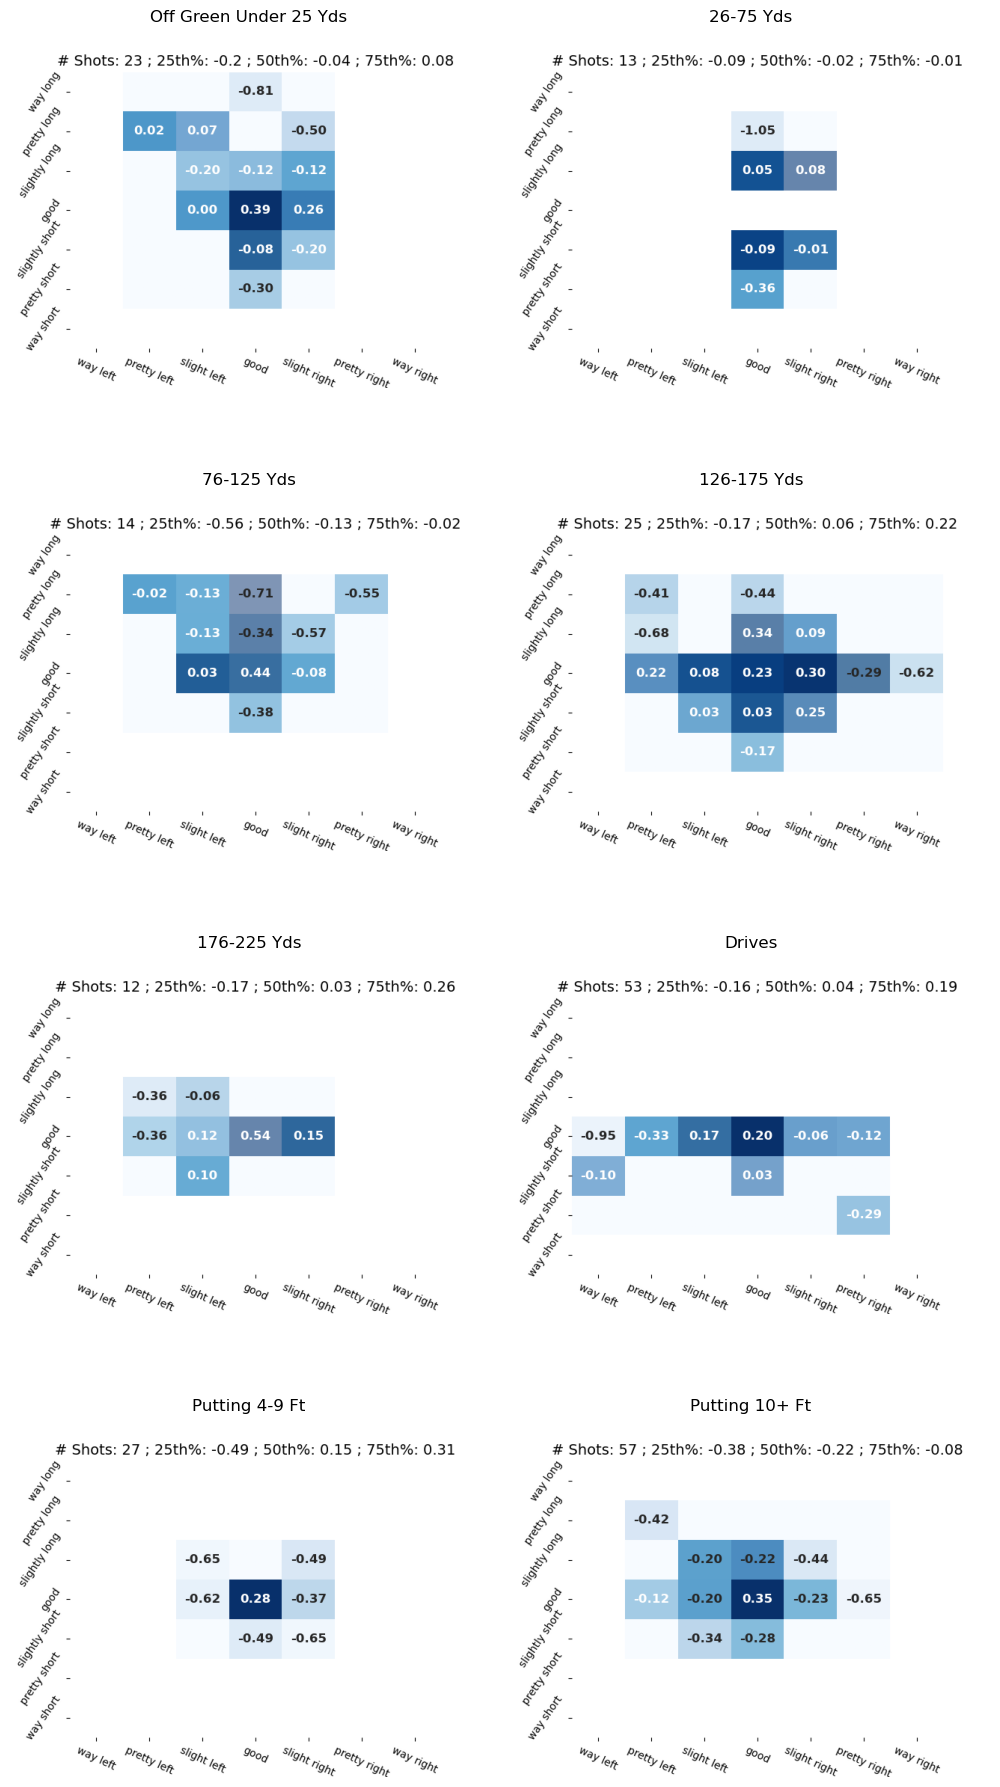

In [226]:
# Create a 1x3 subplot
fig, axs = plt.subplots(4, 2, figsize=(10, 24), sharey=True)

# Load the saved plots and display in the subplots
img1 = mpimg.imread('_0_25.png')
axs[0,0].imshow(img1)
axs[0,0].axis('off')
axs[0,0].set_title('Off Green Under 25 Yds')

img2 = mpimg.imread('_26_75.png')
axs[0,1].imshow(img2)
axs[0,1].axis('off')
axs[0,1].set_title('26-75 Yds')

img3 = mpimg.imread('_76_125.png')
axs[1,0].imshow(img3)
axs[1,0].axis('off')
axs[1,0].set_title('76-125 Yds')

img4 = mpimg.imread('_126_175.png')
axs[1,1].imshow(img4)
axs[1,1].axis('off')
axs[1,1].set_title('126-175 Yds')

img5 = mpimg.imread('_176_225.png')
axs[2,0].imshow(img5)
axs[2,0].axis('off')
axs[2,0].set_title('176-225 Yds')

img6 = mpimg.imread('_Drives.png')
axs[2,1].imshow(img6)
axs[2,1].axis('off')
axs[2,1].set_title('Drives')

img7 = mpimg.imread('G_4_9.png')
axs[3,0].imshow(img7)
axs[3,0].axis('off')
axs[3,0].set_title('Putting 4-9 Ft')

img8 = mpimg.imread('G_10_plus.png')
axs[3,1].imshow(img8)
axs[3,1].axis('off')
axs[3,1].set_title('Putting 10+ Ft', fontsize=12)

# Set labels for axes
# fig.text(0.5, -0.04, 'X axis', ha='center')
# fig.text(-0.04, 0.5, 'Y axis', va='center', rotation='vertical')

fig.tight_layout()
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.05, top=0.95, wspace=0.05, hspace=-0.4)

plt.show()

In [203]:
dist_sg_lie = df[['Lie', 'Strokes', 'Updated Distance']]
dist_sg_lie = dist_sg_lie[(dist_sg_lie['Lie'] != 'G') & (dist_sg_lie['Lie'] != 'WF')]
dist_sg_lie = dist_sg_lie.dropna(subset=['Lie'])
dist_sg_lie['Updated Distance'] = dist_sg_lie['Updated Distance'].astype(float)
print(dist_sg_lie)

    Lie  Strokes  Updated Distance
0     T   -0.770             540.0
2     R   -0.360             202.0
3     R   -0.010              38.0
5     T    0.290             407.0
6     F   -0.230              56.0
..   ..      ...               ...
694   X   -0.400              52.0
695   X   -0.600              12.0
696   F   -0.043              10.0
698   T    0.100             442.0
699   F    0.102             161.0

[395 rows x 3 columns]


In [204]:
dist_sg_lie.dtypes

Lie                  object
Strokes             float64
Updated Distance    float64
dtype: object

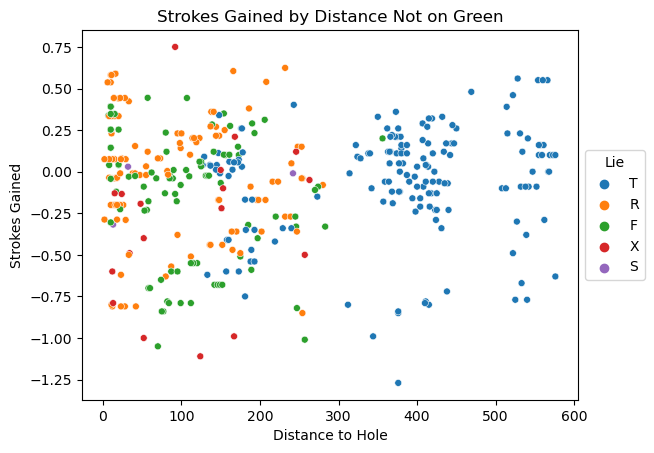

In [205]:
sns.scatterplot(x='Updated Distance', y='Strokes', data=dist_sg_lie, hue='Lie', legend=True, s=25)
plt.legend(title='Lie',loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Distance to Hole')
plt.ylabel('Strokes Gained')
plt.title('Strokes Gained by Distance Not on Green')

plt.show()

In [206]:
putting_sg = df[['Lie', 'Strokes', 'Distance', 'Relative to Par']]
putting_sg = putting_sg[putting_sg['Lie'] == 'G']
putting_sg['Relative to Par'] = putting_sg['Relative to Par'].astype(int)
putting_sg['Distance'] = putting_sg['Distance'].astype(float)

In [207]:
putting_sg.dtypes

Lie                 object
Strokes            float64
Distance           float64
Relative to Par      int32
dtype: object

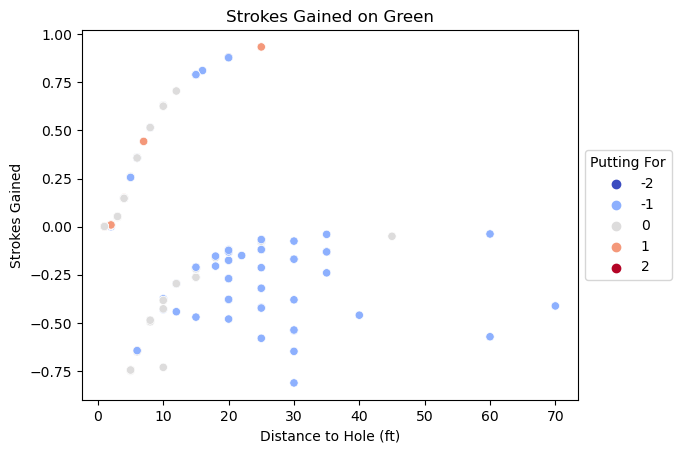

In [234]:
sns.scatterplot(x='Distance', y='Strokes', data=putting_sg, hue='Relative to Par', legend=True, palette="coolwarm")
plt.legend(title='Putting For',loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Distance to Hole (ft)')
plt.ylabel('Strokes Gained')
plt.title('Strokes Gained on Green')

plt.show()

In [209]:
hole_sg = df[['Lie', 'Distance', 'Hole', 'Strokes']]
hole_sg = hole_sg[hole_sg['Lie'] != 'WF']
hole_sg = hole_sg.dropna(subset=['Lie'])
hole_sg['Distance'] = hole_sg['Distance'].astype(float)

In [210]:
hole_sg.dtypes

Lie          object
Distance    float64
Hole          int64
Strokes     float64
dtype: object

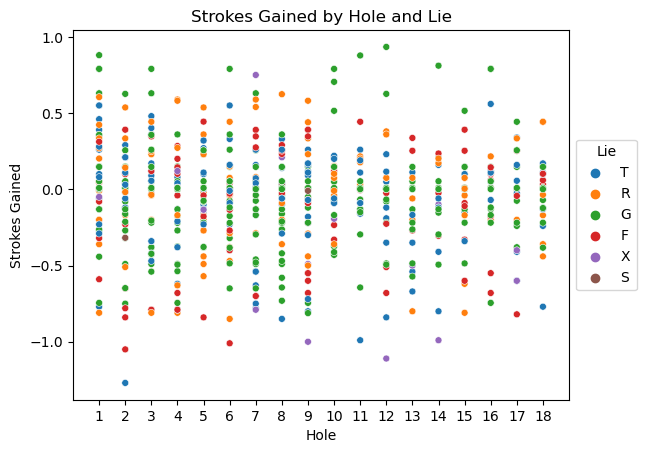

In [211]:
sns.scatterplot(x='Hole', y='Strokes', data=hole_sg, hue='Lie', legend=True, s=25)
plt.legend(title='Lie',loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Hole')
plt.ylabel('Strokes Gained')
plt.xlim(0,19)
plt.xticks(range(1,19))
plt.title('Strokes Gained by Hole and Lie')

plt.show()

In [212]:
putting_df = df[df['Lie'] == 'G']
putting_df.head()

putting_df = putting_df[['Distance', 'Strokes']]
putting_df['Distance'] = putting_df['Distance'].astype(int)
putting_df['Buckets'] = pd.cut(putting_df['Distance'], bins=[4, 7, 13, 21, 40, 200], labels=["4-6", "7-12", "13-20", "21-40", 
                                                                                       "40+"])
print(putting_df.head(20))

putting_df = putting_df.dropna(subset='Buckets')

    Distance  Strokes Buckets
4         15     0.79   13-20
7         25    -0.12   21-40
8          3     0.05     NaN
12         6     0.36     4-6
15         8    -0.49    7-12
16         1     0.00     NaN
20        10    -0.38    7-12
21         1     0.00     NaN
25        15     0.79   13-20
28        40    -0.46   21-40
29         8    -0.49    7-12
30         1     0.00     NaN
32        35    -0.04   21-40
33         3     0.05     NaN
37        20    -0.12   13-20
38         1     0.00     NaN
41        10     0.63    7-12
43        25    -0.32   21-40
44         5    -0.75     4-6
45         2     0.01     NaN


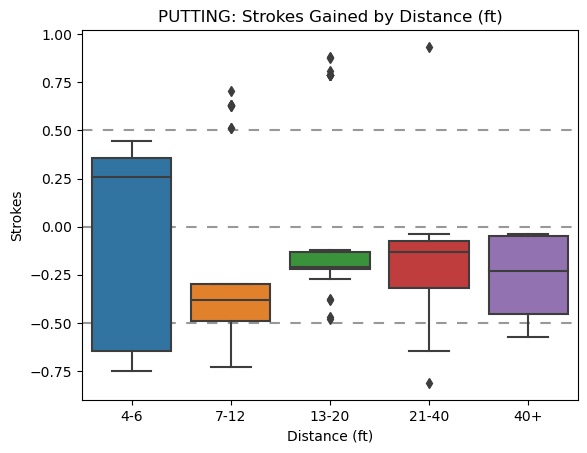

In [225]:
# boxplot
ax = sns.boxplot(x='Buckets', y='Strokes', data=putting_df)
# add stripplot
#ax = sns.stripplot(x='Buckets', y='Strokes', data=putting_df, color="orange", jitter=0.2, size=2.5)

# add title
plt.xlabel('Distance (ft)')
plt.title("PUTTING: Strokes Gained by Distance (ft)")

# Horizontal lines
HLINES = [-.5, 0, .5]

for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)


# show the graph
plt.show()

In [215]:
gs_rough = df[(df['Lie'] == 'R') ]     # & (df['Distance'] < 21)

gs_rough = gs_rough[['Distance', 'Strokes', 'Club']]
gs_rough['Distance'] = gs_rough['Distance'].astype(int)
gs_rough = gs_rough[gs_rough['Distance'] < 21]

#print(gs_rough.head(10))

     Distance  Strokes Club
11         15    0.230   60
19         20   -0.040   60
48         10   -0.040   60
56         15   -0.040   50
79         20   -0.200   60
93         15   -0.810   60
109        15   -0.200   60
172        15    0.440   60
200        20   -0.040   60
220        15   -0.036   50


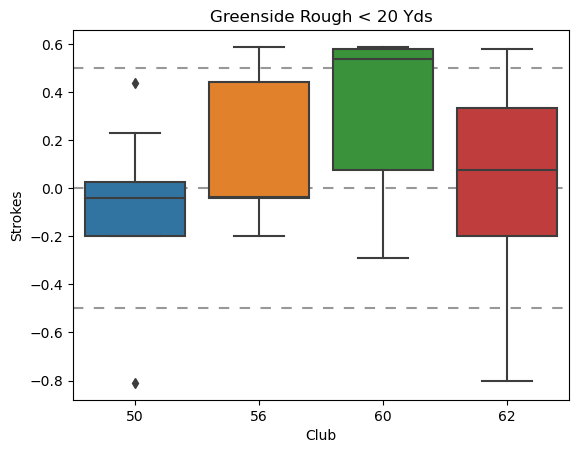

In [216]:
# boxplot
ax = sns.boxplot(x='Club', y='Strokes', data=gs_rough)

label_order = ['50', '56', '60', '62']
plt.gca().set_xticklabels(label_order)

# add title
plt.title("Greenside Rough < 20 Yds")

# Horizontal lines
HLINES = [-.5, 0, .5]

for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)


# show the graph
plt.show()

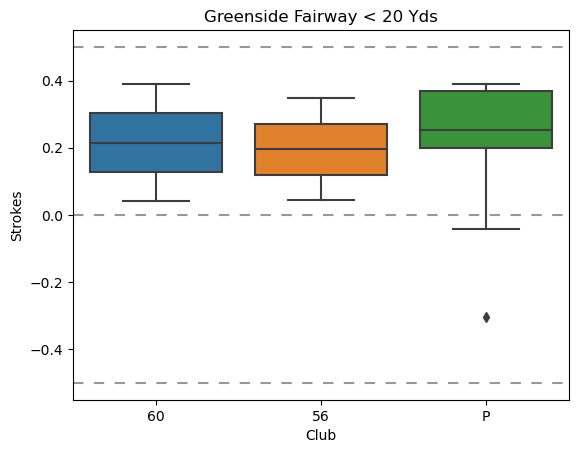

In [217]:
gs_fw = df[(df['Lie'] == 'F') ]     # & (df['Distance'] < 21)

gs_fw = gs_fw[['Distance', 'Strokes', 'Club']]
gs_fw['Distance'] = gs_fw['Distance'].astype(int)
gs_fw = gs_fw[gs_fw['Distance'] < 21]


threshold = 2

filtered_gs_fw = gs_fw.groupby('Club').filter(lambda x: len(x) >= threshold)

# boxplot
ax = sns.boxplot(x='Club', y='Strokes', data=filtered_gs_fw)

#label_order = ['50', '56', '60', '62']
#plt.gca().set_xticklabels(label_order)

# add title
plt.title("Greenside Fairway < 20 Yds")

# Horizontal lines
HLINES = [-.5, 0, .5]

for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)


# show the graph
plt.show()

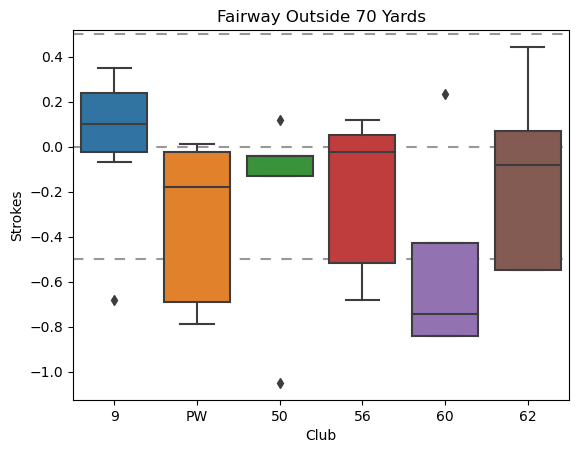

In [218]:
fw_shots = df[(df['Lie'] == 'F') ]     # & (df['Distance'] < 21)

fw_shots = fw_shots[['Distance', 'Strokes', 'Club']]
fw_shots['Distance'] = fw_shots['Distance'].astype(int)
fw_shots = fw_shots[(fw_shots['Distance'] > 68)]
short_irons = ['62', '60', '56', '50', 'PW', '9']
other_irons = ['8', '7', '6', '5', '4', '2']

fw_shots_short = fw_shots[fw_shots['Club'].isin(short_irons)]
fw_shots_other = fw_shots[fw_shots['Club'].isin(other_irons)]

threshold = 2

filtered_fw_shots_short = fw_shots_short.groupby('Club').filter(lambda x: len(x) >= threshold)
filtered_fw_shots_other = fw_shots_other.groupby('Club').filter(lambda x: len(x) >= threshold)

# boxplot
ax = sns.boxplot(x='Club', y='Strokes', data=filtered_fw_shots_short)

label_order = ['9', 'PW','50', '56', '60', '62']
plt.gca().set_xticklabels(label_order)

# add title
plt.title("Fairway Outside 70 Yards")

# Horizontal lines
HLINES = [-.5, 0, .5]

for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)


# show the graph
plt.show()

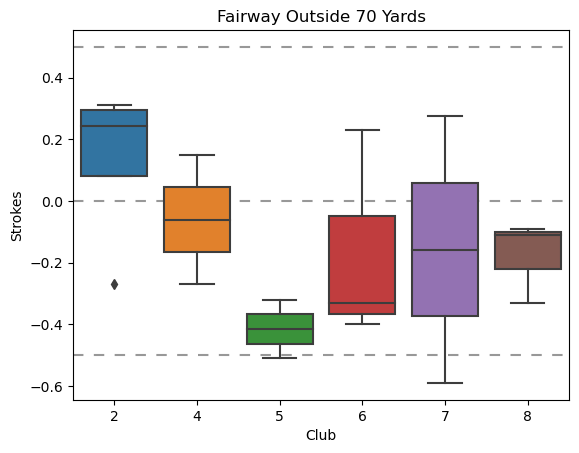

In [219]:
# boxplot
ax = sns.boxplot(x='Club', y='Strokes', data=filtered_fw_shots_other)

label_order = ['2', '4','5', '6', '7', '8']
plt.gca().set_xticklabels(label_order)

# add title
plt.title("Fairway Outside 70 Yards")

# Horizontal lines
HLINES = [-.5, 0, .5]

for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)


# show the graph
plt.show()

In [220]:
off_green = df[(df['Lie'] == 'X') | (df['Lie'] == 'S') | (df['Lie'] == 'R') | (df['Lie'] == 'F') |
              (df['Lie'] == 'T')]
off_green = off_green[['Lie', 'Distance', 'Strokes']]
off_green['Distance'] = off_green['Distance'].astype(int)

In [221]:
off_green['Dist'] = pd.cut(off_green['Distance'], bins=[0,31, 61, 91, 121, 151, 181,211, 241, 271, 900], 
                           labels=["0-30", "31-60", "61-90", "91-120", "121-150", "151-180", "181-210", "211-240",
                                  "241-270", "270+"])
off_green.loc[off_green['Lie'] == 'T', 'Lie'] = 'T/F'
off_green.loc[off_green['Lie'] == 'F', 'Lie'] = 'T/F'
off_green.head()

,Lie,Distance,Strokes,Dist
0,T/F,540,-0.77,270+
2,R,200,-0.36,181-210
3,R,30,-0.01,0-30
5,T/F,400,0.29,270+
6,T/F,55,-0.23,31-60


In [222]:
# # create a crosstab of the two columns
# ct = pd.crosstab(off_green['Lie'], off_green['Dist'])

# ## Calculate the average values of strokes gained for each category combination
# avg = off_green.groupby(['Dist', 'Lie'])['Strokes'].mean().reset_index()

In [223]:
# avg_pivot = avg.pivot(index='Dist', columns='Lie', values='Strokes')
# #avg_pivot = avg_pivot.reindex(index=new_index, columns=new_columns)

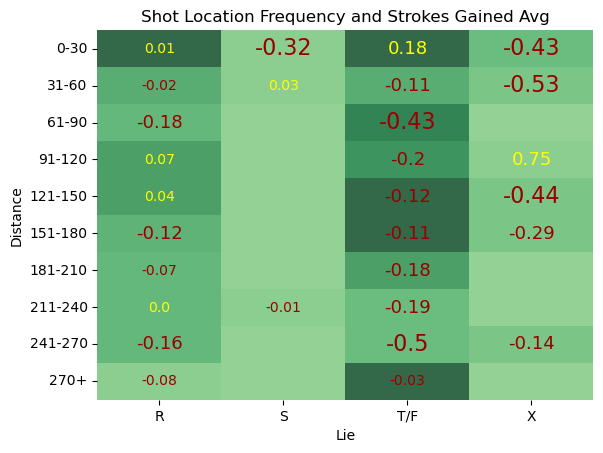

In [224]:
# Create a pivot table with 'Category1' as the row index, 'Category2' as the column index, and 'Value' as the values
piv = off_green.pivot_table(index='Dist', columns='Lie', values='Strokes', aggfunc='count')

# Calculate the mean of the 'Value' column for each 'Category1' and 'Category2' combination
means = off_green.groupby(['Dist', 'Lie'])['Strokes'].mean().round(2)

# Create a heatmap with annotations for both the frequency of occurrence and the mean of the 'Strokes' column
sns.heatmap(piv, cmap='Greens', annot=False, fmt='d', cbar=False,             # take out the annotations of frequency
            annot_kws={'size': 12, 'color': 'black', 'nan':''},                       
            alpha=0.8, vmin=0, vmax=20,                    # max is drives so subtracted to add variety
            center=0.5,
            cbar_kws={'label': 'Frequency'},
            yticklabels=True, xticklabels=True)

for i in range(len(means)):
    row = piv.index.get_loc(means.index[i][0])
    col = piv.columns.get_loc(means.index[i][1])
    if not np.isnan(means[i]):
        if means[i] >= .1:
            plt.text(col+0.5, row+0.5, means[i], ha='center', va='center', color='#FFFF00', fontsize=13)
        elif means[i] >= 0:
            plt.text(col+0.5, row+0.5, means[i], ha='center', va='center', color='#FFFF00', fontsize=10)
        elif means[i] >= -.1:
            plt.text(col+0.5, row+0.5, means[i], ha='center', va='center', color='#990000', fontsize=10)
        elif means[i] >= -.3:
            plt.text(col+0.5, row+0.5, means[i], ha='center', va='center', color='#990000', fontsize=13)
        else:
            plt.text(col+0.5, row+0.5, means[i], ha='center', va='center', color='#990000', fontsize=16)

plt.xlabel('Lie')
plt.ylabel('Distance')

plt.title('Shot Location Frequency and Strokes Gained Avg')

plt.show()